# VCintModel

Machine information 

In [1]:
versioninfo()

Julia Version 1.3.1
Commit 2d5741174c (2019-12-30 21:36 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.6.0)
  CPU: Intel(R) Core(TM) i5-6267U CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, skylake)


## Data

Suppose we have the following variables:

* `y`: $324$-by-$1$ vector of phenotype of interest 
* `X`: $324$-by-$1$ vector indicating sex of each individual 
* `G`: $150$-by-$1$ vector whose $i$-th element is a $324$-by-$q_i$ genotype matrix (matrix of minor allele counts) for gene $i,$ where $i=1,\ldots, 150$ and $q_i$ is the number of variants for gene $i$
* `trtvec`: $324$-by-$1$ vector indicating treatment status of each individual. 

These variables are saved in `.jld2` file. First, read in variables using `JLD2` package. 

In [4]:
using JLD2
@load "/Users/juhyun-kim/Box Sync/workspace/vcselect/codebase/julia/VCSEL.jl/docs/SNPset_interaction.jld2" y y2 X G V trtvec

6-element Array{Symbol,1}:
 :y     
 :y2    
 :X     
 :G     
 :V     
 :trtvec

Our phenotype vector: 

In [5]:
y

324-element Array{Float64,1}:
 -0.40911273847444835 
 -0.0597995644528963  
  0.02798994878695149 
 -0.5810287222548617  
  0.4325440331155418  
  0.048256153207898195
 -0.27027696763685594 
  0.10490944338119751 
 -0.7799009563553139  
 -0.20593444247247622 
  0.5520065403740653  
 -0.10092686337307819 
  0.5983104367265357  
  ⋮                   
  0.03739468023738035 
  0.47352506877371714 
 -0.22836115042409924 
 -0.3876214190551975  
  0.10326243849550518 
 -0.4882830145406528  
 -0.06903684417417116 
  0.09798041795966334 
 -0.1480073641765541  
 -0.29900800903355274 
 -0.008878790322644575
 -0.09571535379121696 

Covariate matrix indicating sex:

In [6]:
X

324-element Array{Float64,1}:
 1.0
 2.0
 2.0
 1.0
 2.0
 1.0
 2.0
 2.0
 2.0
 1.0
 2.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 2.0
 2.0
 2.0
 1.0
 1.0
 2.0
 1.0
 1.0
 1.0
 2.0

Vector of genotype matrix for each gene: 

In [7]:
G

150-element Array{Array{Float64,2},1}:
 [2.0 0.0 … 2.0 2.0; 2.0 1.0 … 1.4485981308411215 2.0; … ; 2.0 0.0 … 1.0 2.0; 2.0 0.0 … 2.0 2.0]
 [2.0 2.0 … 2.0 2.0; 2.0 1.0 … 1.0 0.0; … ; 2.0 1.0 … 1.0 0.0; 2.0 2.0 … 1.0 2.0]               
 [2.0 2.0 … 0.0 2.0; 2.0 2.0 … 2.0 2.0; … ; 2.0 2.0 … 1.0 2.0; 2.0 2.0 … 0.0 1.0]               
 [2.0 1.0 … 0.0 2.0; 2.0 1.0 … 0.0 2.0; … ; 2.0 0.0 … 1.0 2.0; 1.0 1.0 … 1.0 2.0]               
 [1.0 2.0 … 0.0 2.0; 1.0 2.0 … 1.0 2.0; … ; 0.0 2.0 … 1.0 2.0; 2.0 2.0 … 0.0 2.0]               
 [2.0 2.0 … 1.0 2.0; 2.0 2.0 … 1.0 2.0; … ; 2.0 2.0 … 1.0 2.0; 2.0 2.0 … 1.0 2.0]               
 [2.0 1.0 … 1.0 2.0; 2.0 1.0 … 1.0 2.0; … ; 2.0 2.0 … 0.0 2.0; 2.0 2.0 … 1.0 2.0]               
 [1.0 1.0 … 1.0 1.0; 1.0 2.0 … 1.0 0.0; … ; 2.0 2.0 … 2.0 1.0; 2.0 2.0 … 2.0 1.0]               
 [2.0 2.0 … 2.0 0.0; 2.0 1.0 … 1.0 0.0; … ; 1.0 2.0 … 2.0 0.0; 2.0 2.0 … 2.0 1.0]               
 [2.0 2.0 … 2.0 1.0; 2.0 2.0 … 2.0 1.0; … ; 2.0 2.0 … 2.0 1.0; 2.0 0.0 … 2.0 1.0]       

Elements in `G` are matrices of size $324\times q_i.$ Number of rows must be the same (n=324) because each row is for each individual. On the other hand, number of columns vary because number of SNPs/variants vary from gene to gene. Here we list different sizes elements of `G` have: 

In [8]:
unique(size.(G))

8-element Array{Tuple{Int64,Int64},1}:
 (324, 44)
 (324, 27)
 (324, 47)
 (324, 14)
 (324, 42)
 (324, 29)
 (324, 30)
 (324, 18)

Vector of treatment status:

In [9]:
trtvec

324-element Array{Int64,1}:
 0
 0
 0
 0
 1
 1
 0
 1
 0
 1
 1
 1
 1
 ⋮
 1
 1
 0
 0
 0
 0
 1
 0
 0
 0
 0
 1

Let us create a diagonal matrix whose elements are from `trtvec`:


In [10]:
using LinearAlgebra
T = Diagonal(trtvec)

324×324 Diagonal{Int64,Array{Int64,1}}:
 0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  0  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  0  ⋅  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  ⋅  …  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅     ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅ 

Now based on what we have, we will create two vectors of covariance matrices:

* `V`: 151-by-1 vector of 324-by-324 matrices 
    - `V[i]` $ = G_i G_i^T / ||G_i G_i^T||_F$ where $i=1,\ldots,150$
    - `V[end]` $= I_{324} / \sqrt{324}$
* `Vint`: 150-by-1 vector of 324-by-324 matrices
    - `Vint[i]` $ = T G_i G_i^T T^T / ||T G_i G_i^T T^T||_F$ where $i = 1,\ldots, 150.$
    
Note that we divide by Frobenius norm ($||\cdot||_F$) to put matrices on the same scale.

In [11]:
n, m = length(y), length(G)
V = Vector{Matrix{Float64}}(undef, m + 1)
Vint = Vector{Matrix{Float64}}(undef, m)
    
for i in 1:m
    V[i] = G[i] * G[i]'
    Vint[i] = T * V[i] * T' 
    V[i] ./= norm(V[i])
    Vint[i] ./= norm(Vint[i])
end 
V[end] = Matrix(I, n, n) ./ √n;

In [12]:
V

151-element Array{Array{Float64,2},1}:
 [0.003291667254666042 0.003021726705196923 … 0.0030853699763006446 0.002995120655146579; 0.003021726705196923 0.0031759677171174796 … 0.0029207450416141385 0.0029624173852930303; … ; 0.0030853699763006446 0.0029207450416141385 … 0.0033536029685539274 0.0030544299750504714; 0.002995120655146579 0.0029624173852930303 … 0.0030544299750504714 0.0034695952143777202]    
 [0.0038736704792971055 0.0031542745331419285 … 0.0034586343565152725 0.00367998695533225; 0.0031542745331419285 0.0030989363834376844 … 0.0032372817576982954 0.0030989363834376844; … ; 0.0034586343565152725 0.0032372817576982954 … 0.0037353251050364945 0.0034032962068110285; 0.00367998695533225 0.0030989363834376844 … 0.0034032962068110285 0.003790663254740739]    
 [0.003134943134737379 0.0029621509934526415 … 0.003011520176676852 0.0027399896689436934; 0.0029621509934526415 0.003283050684410011 … 0.0030608893599010627 0.0028387280353921146; … ; 0.003011520176676852 0.003060889359901

In [13]:
Vint

150-element Array{Array{Float64,2},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007022323013197897] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.00773729902969992]  
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0064020557433550306]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007187137793403356] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007319758091161073] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007135751936863028] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.006472228768822936] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007290657333798592] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.007352558297122053] 
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0

## Model formulation 

We assume the response vector $y$ is distributed as follows: <a id='modeleqn'></a>

$$y \sim N(X\beta, \sum_{i=1}^{m} \left( \sigma_{i1}^2 V_{i1} +  \sigma_{i2}^2 V_{i2}\right) + \sigma_0^2 I_n ), \hspace{5em} (1)$$

such that each gene/group (indexed by $i$) is associated with two variance components
- $\sigma_{i1}^2$: for the gene/group itself 
- $\sigma_{i2}^2$: for the interaction between gene/group and treatment status indicated by $T$. 

Suppose we want to include/exclude main effects and interaction term together as a pair and identify the pairs that are associated with the response $y.$ In other words, all-in or all-out! This can be achieved by setting up `VCintModel` in `VarianceComponentSelect` package.

## VCintModel

First load the package. 

In [14]:
using VCSEL

To perform selection, take 2 steps:

**Step 1 (Construct a model)**. Construct an instance of `VCintModel`, which is the fundamental type for variance component interaction model. It consists of fields 

* `Y`: $n$-by-$1$ responses. 
* `X`: $n$-by-$p$ covariate matrix (if exists).
* `V=(V[1],...,V[m],I)`: a vector of $n$-by-$n$ covariance matrices. The last covariance matrix must be positive definite and usually is the identity matrix.
* `Vint=(Vint[1],...,Vint[m])`: a vector of $n$-by-$n$ covariance matrices. 
* `Σ=(Σ[1],...,Σ[m],Σ[0])`: a vector of initial estimates for variance component parameters. If not supplied, it is set to be a vector of ones by default. In the notation of [(1)](#modeleqn) above, it is equivalent to $(\sigma_{11}^2, \ldots, \sigma_{m1}^2, \sigma_0^2).$
* `Σint=(Σint[1],...,Σint[m])`: a vector of initial estimates for variance component parameters. If not supplied, it is set to be a vector of ones by default. In the notation of [(1)](#modeleqn) above, it is equivalent to $(\sigma_{12}^2, \ldots, \sigma_{m2}^2).$

`VCintModel` can be initialized by 

Let us construct a `VCintModel` using `Y`, `X`, `Vint` and `V`. 

In [15]:
vcm = VCintModel(y, X, V, Vint);

Since we did not provide `Σ` and `Σint`, both have been initialized to be a vector of ones. 

In [16]:
vcm.Σ

151-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [17]:
vcm.Σint

150-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

**Step 2 (optimize)**. Call optimization routine `vcselect!`.

Required input argument for executing `vcselect!` is `VCModel`:
    
- `vcm`: `VCModel`.

Keyword Arguments are 

- `penfun`: penalty function. Default is `NoPenalty()`.
- `λ`: tuning parameter. Default is 1.    
- `penwt`: penalty weights. Default is (1,...1,0).
- `standardize`: logical flag for covariance matrix standardization. Default is `true`.
    If true, `V[i]` is standardized by its Frobenius norm, and parameter estimates are 
    returned on the original scale.
- `maxiters`: maximum number of iterations. Default is 1000.
- `tol`: convergence tolerance. Default is `1e-6`.
- `verbose`: display switch. Default is false.
- `checktype`: check argument type switch. Default is true.

<a id='no-penalty'></a>
### No penalty 

First, we call `vcselect!` without specifying any penalty function. By default, it is fit with no penalty (i.e. $\lambda=0$).

In [18]:
vcm_nopen = deepcopy(vcm)
vcm_nopen, obj, niters, = vcselect!(vcm_nopen);

The output of `vcselect!` include

* fitted model 

Estimates can be accessed as below: 

In [19]:
# variance components for main effect 
vcm_nopen.Σ

151-element Array{Float64,1}:
  2.5963273409545298e-73 
  1.5439706985758424e-7  
  2.7845360519855295e-120
  6.889737267658894e-13  
  3.0779900070490343e-43 
 10.543433098739069      
  8.578672602981094e-35  
  1.5269695674030925e-33 
  1.6993304550667486e-35 
  3.3296085240515394e-9  
  5.512147924579434e-90  
  3.7878294671111184e-70 
  1.2271458940210706e-88 
  ⋮                      
  9.542566060974258e-77  
  1.1294134073945298e-24 
  9.889397642959301e-47  
  9.203195171446197e-24  
  8.242876864397448e-24  
  0.027261479173068266   
  8.193938421458612e-66  
  0.000326447581412278   
  3.844899854910732      
  5.140003144343048e-75  
 19.54205330804444       
  1.0e-5                 

In [20]:
# variance components for interaction effect 
vcm_nopen.Σint

150-element Array{Float64,1}:
 5.583941413028418e-23 
 4.032502081578074e-5  
 4.7005690749412404e-45
 5.906798441125674e-86 
 1.9753663675986057e-20
 4.655750245261412e-66 
 7.856097003369574e-30 
 1.920963848171632e-63 
 3.225692325451241e-14 
 6.362600062147988e-44 
 7.426714300995976e-65 
 9.071099826597901e-70 
 6.389468493257881e-127
 ⋮                     
 7.673511404849686e-12 
 2.4052807249110344e-45
 8.063806215679226e-41 
 1.1271638588765185e-29
 2.2133609274252957e-28
 1.5467148697850265e-39
 1.7912324787115269e-99
 2.5809990379022182e-54
 2.8169429947839254e-25
 4.0370696435922415e-32
 8.876979016628995e-61 
 3.702978317572343     

In [21]:
# mean regression coefficients 
vcm_nopen.β

1-element Array{Float64,1}:
 -0.052533697142513214

* final objective value

In [22]:
obj

-6.450758464935063

* number of iterations taken to converge 

In [23]:
niters

653

### Selection at specific tuning parameter 

Now we specify penalty function `penfun=L1Penalty()` and regularization parameter value `λ=2.5`. 

In [24]:
vcm_L1 = deepcopy(vcm)
vcm_L1, obj_L1, niters_L1, = vcselect!(vcm_L1; penfun=L1Penalty(), λ=2.0);

In [25]:
vcm_L1.Σ

151-element Array{Float64,1}:
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 ⋮                  
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 0.0                
 6.95611535270397   
 0.06512889698055956

In [26]:
vcm_L1.Σint

150-element Array{Float64,1}:
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 ⋮                 
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 1.3122971294142092

In [27]:
vcm_L1.β

1-element Array{Float64,1}:
 -0.060222670503915894

In [28]:
obj_L1

46.00807848829564

In [29]:
niters_L1

64

## Obtain solution path 

`vcselectpath!` function to compute regularization path for a given penalty at a grid of the regularization parameter lambda values. `vcselectpath!` provides options for users to customize. Keyword arguments for the function are 

- `penfun`: penalty function (e.g. `NoPenalty()`, `L1Penalty()`, `MCPPenalty()`). Default is `NoPenalty()`.
- `penwt`: weights for penalty term. Default is (1,1,...1,0).
- `nλ`: number of `λ` values in the sequence. Default is 100. 
- `λpath`: user-provided sequence of `λ` values in ascending order. Typically the program computes its own `λ` sequence based on `nλ`, but supplying `λpath` overrides this.
- `maxiter`: maximum number of iteration for MM loop. Default is 1000.
- `standardize`: logical flag for covariance matrix standardization. Default is `true`. If true, `V[i]` is standardized by its Frobenius norm.
- `tol`: convergence tolerance. Default is `1e-6`.

When called without any penalty, `vcselectpath!` returns the same output as `vcselect!` with `penfun=NoPenalty()` ([compare the output](#no-penalty)). 

In [30]:
vcmpath_np = deepcopy(vcm)
Σ̂path_np, Σ̂intpath_np, β̂path_np, λpath_np, objpath_np, niterspath_np = vcselectpath!(vcmpath_np)

([2.5963273409545298e-73, 1.5439706985758424e-7, 2.7845360519855295e-120, 6.889737267658894e-13, 3.0779900070490343e-43, 10.543433098739069, 8.578672602981094e-35, 1.5269695674030925e-33, 1.6993304550667486e-35, 3.3296085240515394e-9  …  9.889397642959301e-47, 9.203195171446197e-24, 8.242876864397448e-24, 0.027261479173068266, 8.193938421458612e-66, 0.000326447581412278, 3.844899854910732, 5.140003144343048e-75, 19.54205330804444, 1.0e-5], [5.583941413028418e-23, 4.032502081578074e-5, 4.7005690749412404e-45, 5.906798441125674e-86, 1.9753663675986057e-20, 4.655750245261412e-66, 7.856097003369574e-30, 1.920963848171632e-63, 3.225692325451241e-14, 6.362600062147988e-44  …  8.063806215679226e-41, 1.1271638588765185e-29, 2.2133609274252957e-28, 1.5467148697850265e-39, 1.7912324787115269e-99, 2.5809990379022182e-54, 2.8169429947839254e-25, 4.0370696435922415e-32, 8.876979016628995e-61, 3.702978317572343], [-0.052533697142513214], [0.0], -6.450758464935063, 653)

In [31]:
Σ̂path_np

151-element Array{Float64,1}:
  2.5963273409545298e-73 
  1.5439706985758424e-7  
  2.7845360519855295e-120
  6.889737267658894e-13  
  3.0779900070490343e-43 
 10.543433098739069      
  8.578672602981094e-35  
  1.5269695674030925e-33 
  1.6993304550667486e-35 
  3.3296085240515394e-9  
  5.512147924579434e-90  
  3.7878294671111184e-70 
  1.2271458940210706e-88 
  ⋮                      
  9.542566060974258e-77  
  1.1294134073945298e-24 
  9.889397642959301e-47  
  9.203195171446197e-24  
  8.242876864397448e-24  
  0.027261479173068266   
  8.193938421458612e-66  
  0.000326447581412278   
  3.844899854910732      
  5.140003144343048e-75  
 19.54205330804444       
  1.0e-5                 

In [32]:
Σ̂intpath_np

150-element Array{Float64,1}:
 5.583941413028418e-23 
 4.032502081578074e-5  
 4.7005690749412404e-45
 5.906798441125674e-86 
 1.9753663675986057e-20
 4.655750245261412e-66 
 7.856097003369574e-30 
 1.920963848171632e-63 
 3.225692325451241e-14 
 6.362600062147988e-44 
 7.426714300995976e-65 
 9.071099826597901e-70 
 6.389468493257881e-127
 ⋮                     
 7.673511404849686e-12 
 2.4052807249110344e-45
 8.063806215679226e-41 
 1.1271638588765185e-29
 2.2133609274252957e-28
 1.5467148697850265e-39
 1.7912324787115269e-99
 2.5809990379022182e-54
 2.8169429947839254e-25
 4.0370696435922415e-32
 8.876979016628995e-61 
 3.702978317572343     

Now let us call `vcselectpath!` with `penfun=L1Penalty()`. We will specify the number of regularization parameters to be 50, i.e. `nλ=50`. 

In [33]:
vcm_path = deepcopy(vcm)
Σ̂path, Σ̂intpath, β̂path, λpath, objpath, niterspath = vcselectpath!(vcm_path; 
    nλ=50, penfun=L1Penalty());

Output of `vcselectpath!` includes

* path for main effect variance components: $(i,j)$-th element corresponds to $i$-th variance component (main effect) at `λpath[j]`, $i=1,\ldots, 150, \; j=1,\ldots, 50$. The last row is for the residual variance component $\sigma_0^2.$ 

In [34]:
Σ̂path

151×50 Array{Float64,2}:
  2.59633e-73    0.0       0.0      …  0.0        0.0        0.0      
  1.54397e-7     0.0       0.0         0.0        0.0        0.0      
  2.78454e-120   0.0       0.0         0.0        0.0        0.0      
  6.88974e-13    0.0       0.0         0.0        0.0        0.0      
  3.07799e-43    0.0       0.0         0.0        0.0        0.0      
 10.5434         9.34376   9.361    …  0.0        0.0        0.0      
  8.57867e-35    0.0       0.0         0.0        0.0        0.0      
  1.52697e-33    0.0       0.0         0.0        0.0        0.0      
  1.69933e-35    0.0       0.0         0.0        0.0        0.0      
  3.32961e-9     0.0       0.0         0.0        0.0        0.0      
  5.51215e-90    0.0       0.0      …  0.0        0.0        0.0      
  3.78783e-70    0.0       0.0         0.0        0.0        0.0      
  1.22715e-88    0.0       0.0         0.0        0.0        0.0      
  ⋮                                 ⋱               

* path for interaction effect variance components: $(i,j)$-th element corresponds to $i$-th variance component (interaction effect) at `λpath[j]`, $i=1,\ldots, 150, \; j=1,\ldots, 50$. 

In [35]:
Σ̂intpath

150×50 Array{Float64,2}:
 5.58394e-23   0.0          …  0.0     0.0      0.0      0.0    
 4.0325e-5     0.0             0.0     0.0      0.0      0.0    
 4.70057e-45   0.0             0.0     0.0      0.0      0.0    
 5.9068e-86    0.0             0.0     0.0      0.0      0.0    
 1.97537e-20   0.0             0.0     0.0      0.0      0.0    
 4.65575e-66   1.4808e-125  …  0.0     0.0      0.0      0.0    
 7.8561e-30    0.0             0.0     0.0      0.0      0.0    
 1.92096e-63   0.0             0.0     0.0      0.0      0.0    
 3.22569e-14   0.0             0.0     0.0      0.0      0.0    
 6.3626e-44    0.0             0.0     0.0      0.0      0.0    
 7.42671e-65   0.0          …  0.0     0.0      0.0      0.0    
 9.0711e-70    0.0             0.0     0.0      0.0      0.0    
 6.38947e-127  0.0             0.0     0.0      0.0      0.0    
 ⋮                          ⋱                                   
 7.67351e-12   0.0             0.0     0.0      0.0      0.0    


* mean regression coefficient path: $j$-th element in `β̂path` corresponds to $p$-by-$d$ coefficients at `λpath[j]`.

In [36]:
β̂path

1×50 Array{Float64,2}:
 -0.0525337  -0.0574108  -0.0614433  …  -0.0689376  -0.0694004  -0.0698827

* grid of $\lambda$ values used 

In [37]:
 λpath

0.0:0.2613768180038204:12.807464082187199

* final objective values at each $\lambda$

In [38]:
objpath

50-element Array{Float64,1}:
 -6.450758464935063
 12.608781857439176
 29.740918146389646
 46.58745550168618 
 63.0499817184177  
 78.51063884431443 
 44.04671375173535 
 45.50429333341199 
 46.88845169092497 
 48.20288920398775 
 49.45150824282938 
 50.639399398007185
 51.77074241935276 
  ⋮                
 65.05170951919716 
 65.49822962756343 
 65.93806990303631 
 66.3714071907036  
 66.7984070823538  
 67.21922471233304 
 67.63400545627302 
 68.04288555435161 
 68.44599267068834 
 68.84344639650688 
 69.2353587029081  
 69.62183434809802 

* number of iterations at each $\lambda$

In [39]:
niterspath

50-element Array{Int64,1}:
 653
 587
 252
  10
  17
 101
 272
   9
  10
  10
  11
  11
  11
   ⋮
   4
   4
   4
   4
   4
   4
   4
   4
   4
   4
   4
   4

### Visualize 

Solution path can be visualized by using `plotsolpath` function. `plotsolpath` plots norms of pairs $(\sigma_{i1}^2, \sigma_{i2}^2)$ along $\lambda$ values. 

Required arguments are 

* `Σ̂path`: solution path for main effects 
* `Σ̂intpath`: solution path for interaction effects
* `λpath`: regularization parameter grid.

Plot can be customized via keyword arguments:

- `title`: title of the figure. Default is "Solution Path".
- `xlab`: x-axis label. Default is "lambda".
- `ylab`: y-axis label. Default is "sigma_i^2".
- `xmin`: lower limit for x-axis. default is minimum of `λpath`.
- `xmax`: upper limit for x-axis. default is maximum of `λpath`.
- `linewidth`: line width. Default is 1.0.
- `nranks`: no. of ranks to displayed on legend. Default is total number of variance components.
- `legend`: logical flag for including legend. Default is true.
- `legendout`: logical flag for moving the legend outside the plot. Default is true. 
- `legendtitle`: legend title. Default is "Ranking". 
- `resvarcomp`: logical flag for indicating residual variance component in `Σpath`. Default is true. 

We plot the path:

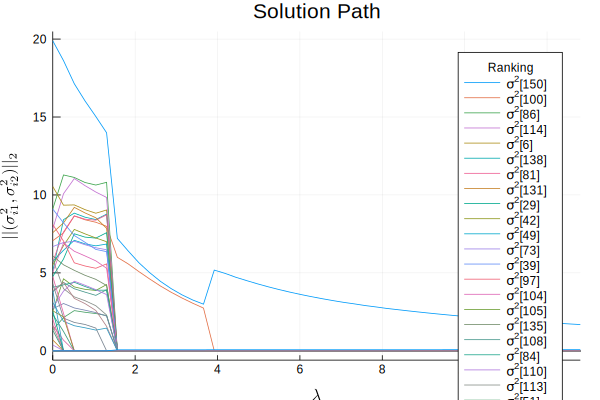

In [40]:
plotsolpath(Σ̂path, Σ̂intpath, λpath)

Since the legend contains too many values, we limit it to 15.

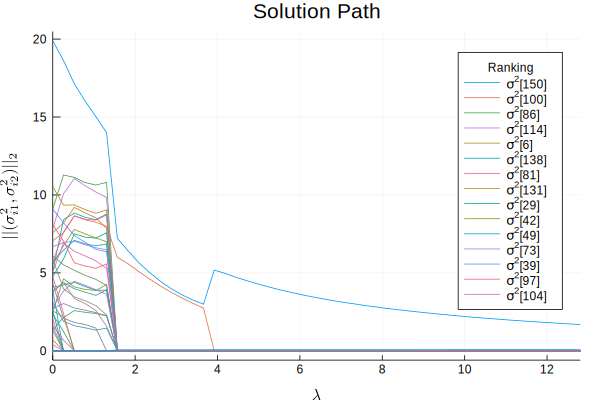

In [41]:
plotsolpath(Σ̂path, Σ̂intpath, λpath; nranks=15)